<a href="https://colab.research.google.com/github/itzayush21/college_ml_project/blob/main/ML_Model_%26_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">ASSIGNMENT 1</font>

## <font color="aqua">Import Library</font>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

## <font color="aqua">Loading DATASET</font>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rishidamarla/heart-disease-prediction")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/heart-disease-prediction


In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## <font color="aqua">DATA EXPLORATION</font>

In [ ]:
# Data types and non-null info
print("\nInfo:")
df.info()

# Statistical summary
print("\nDescribe:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int6

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


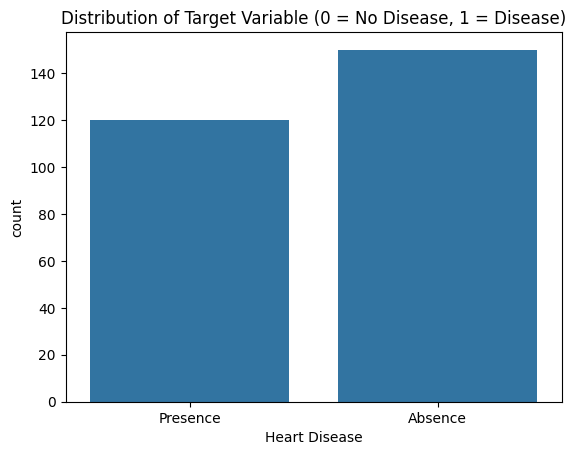

In [ ]:
sns.countplot(x='Heart Disease', data=df)
plt.title("Distribution of Target Variable (0 = No Disease, 1 = Disease)")
plt.show()

## <font color="aqua">Outlier Detection</font>

In [ ]:
def detect_outliers_iqr(df, column):
    """
    Detects outliers in a given column using the IQR method.
    Returns a DataFrame of outlier rows.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} → Found {outliers.shape[0]} outliers")
    return outliers


# Run for all numeric columns
numeric_cols = df.select_dtypes(include='number').columns

outlier_summary = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

# Display summary
print("\nOutlier count per column:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")

Age → Found 0 outliers
Sex → Found 0 outliers
Chest pain type → Found 20 outliers
BP → Found 9 outliers
Cholesterol → Found 5 outliers
FBS over 120 → Found 40 outliers
EKG results → Found 0 outliers
Max HR → Found 1 outliers
Exercise angina → Found 0 outliers
ST depression → Found 4 outliers
Slope of ST → Found 0 outliers
Number of vessels fluro → Found 19 outliers
Thallium → Found 0 outliers

Outlier count per column:
Age: 0
Sex: 0
Chest pain type: 20
BP: 9
Cholesterol: 5
FBS over 120: 40
EKG results: 0
Max HR: 1
Exercise angina: 0
ST depression: 4
Slope of ST: 0
Number of vessels fluro: 19
Thallium: 0


## <font color="aqua">PCA</font>

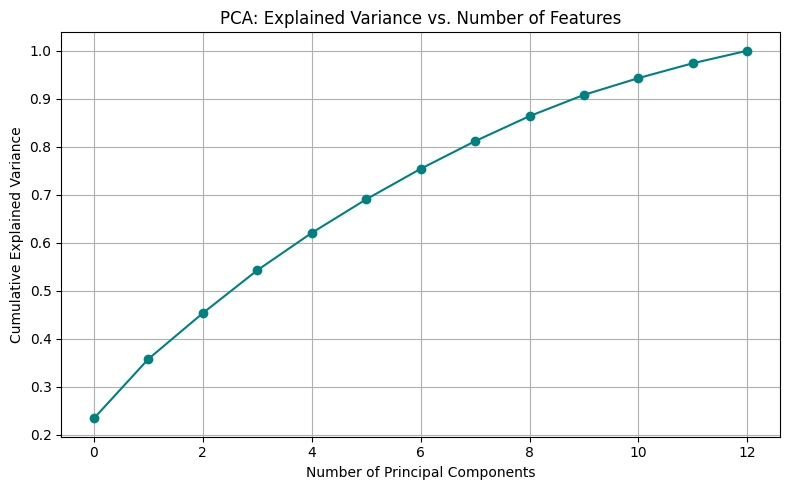


Explained Variance by Principal Components:
 PC1     0.2343
PC2     0.1237
PC3     0.0955
PC4     0.0893
PC5     0.0779
PC6     0.0699
PC7     0.0635
PC8     0.0576
PC9     0.0521
PC10    0.0443
PC11    0.0349
PC12    0.0310
PC13    0.0261
dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select only numeric features (excluding target)
X = df.drop(columns=['Heart Disease']) if 'Heart Disease' in df.columns else df.copy()

# Step 1: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='teal')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Features')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print explained variance ratio for each feature
explained = pd.Series(pca.explained_variance_ratio_,
                      index=[f'PC{i+1}' for i in range(len(X.columns))])
print("\nExplained Variance by Principal Components:\n", explained.round(4))


In [ ]:
loadings = pd.DataFrame(np.abs(pca.components_), columns=X.columns)
mean_loading = loadings.mean(axis=0).sort_values()

# Show features contributing the least across all PCs
print("\nLeast contributing features (lowest mean absolute loading):")
print(mean_loading.head(5))


Least contributing features (lowest mean absolute loading):
EKG results      0.190368
Slope of ST      0.196213
FBS over 120     0.203962
ST depression    0.217653
Age              0.221072
dtype: float64


## <font color="aqua">Model Training (best)</font>

In [ ]:
X = df.drop(columns=['Heart Disease'])  # Assuming 'target' is the column for heart disease presence (1 = disease, 0 = no disease)
y = df['Heart Disease']

In [ ]:
# Encoding categorical features (if necessary)
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
# Assuming categorical columns need encoding like 'Sex', 'Chest pain type', etc.
categorical_columns = ['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid for tuning (including regularization type 'l1' and 'l2')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers compatible with L1 and L2 regularization
    'penalty': ['l1', 'l2']  # L1 (Lasso) and L2 (Ridge) regularization
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters from GridSearchCV: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
best_log_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9259259259259259

Classification Report:
               precision    recall  f1-score   support

     Absence       0.89      1.00      0.94        33
    Presence       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54


Confusion Matrix:
 [[33  0]
 [ 4 17]]


## <font color="aqua">SAVING MODEL AND INFERENCE</font>

In [ ]:
# prompt: write a pickle  code to save the model

import pickle

# Assuming 'best_log_reg' is your trained model
filename = 'heart_disease_model.sav'
pickle.dump(best_log_reg, open(filename, 'wb'))


In [ ]:
# prompt: use /content/heart_disease_model.sav to test a inference

import pickle
import numpy as np

# Load the saved model
loaded_model = pickle.load(open('/content/heart_disease_model.sav', 'rb'))

# Example inference with a sample input (replace with your actual data)
# Ensure the input features match the training data's format
example_input = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])

# Make a prediction
prediction = loaded_model.predict(example_input)

print("Prediction:", prediction)

# Example for multiple predictions
example_inputs = np.array([
    [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1],
    [37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]
])
predictions = loaded_model.predict(example_inputs)
print("Predictions:", predictions)


Prediction: ['Presence']
Predictions: ['Presence' 'Absence']


## <font color="aqua">Confusion Matrix</font>

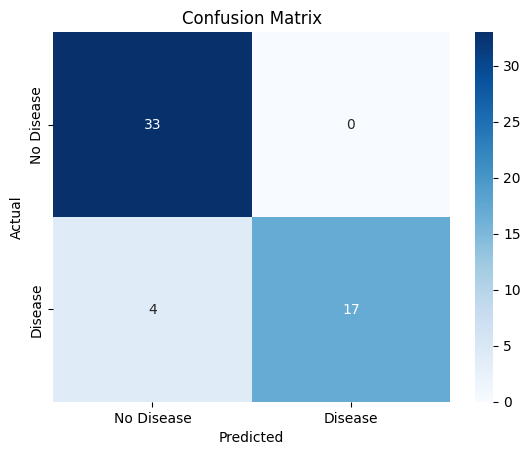

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## <font color="yellow">More Testing</font> not needed

## Model Training 2

In [ ]:
# Logistic Regression with class weights to handle imbalance
log_reg_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')

# Hyperparameter grid for tuning (including class_weight)
param_grid_weighted = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# GridSearchCV for hyperparameter tuning
grid_search_weighted = GridSearchCV(log_reg_weighted, param_grid_weighted, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
grid_search_weighted.fit(X_train, y_train)

# Best parameters
print("Best parameters from GridSearchCV with class weights:", grid_search_weighted.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters from GridSearchCV with class weights: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
best_log_reg = grid_search_weighted.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9074074074074074

Classification Report:
               precision    recall  f1-score   support

     Absence       0.87      1.00      0.93        33
    Presence       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54


Confusion Matrix:
 [[33  0]
 [ 5 16]]


## Model Training 3

In [ ]:
X = df.drop(columns=['Heart Disease','EKG results'])  # Assuming 'target' is the column for heart disease presence (1 = disease, 0 = no disease)
y = df['Heart Disease']

In [ ]:
# Encoding categorical features (if necessary)
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
# Assuming categorical columns need encoding like 'Sex', 'Chest pain type', etc.
categorical_columns = ['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST', 'Thallium']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameter grid for tuning (including regularization type 'l1' and 'l2')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers compatible with L1 and L2 regularization
    'penalty': ['l1', 'l2']  # L1 (Lasso) and L2 (Ridge) regularization
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters from GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters from GridSearchCV: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
best_log_reg = grid_search.best_estimator_

# Predict on the test set
y_pred = best_log_reg.predict(X_test)

# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8703703703703703

Classification Report:
               precision    recall  f1-score   support

     Absence       0.84      0.97      0.90        33
    Presence       0.94      0.71      0.81        21

    accuracy                           0.87        54
   macro avg       0.89      0.84      0.86        54
weighted avg       0.88      0.87      0.87        54


Confusion Matrix:
 [[32  1]
 [ 6 15]]


# <font color="red">Project 2</font>

## <font color="aqua">Gradient Search CV (not recommended)</font>

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

print(len(X))

# Normalize
X = X / 255.0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3],
    'weights': ['distance'],
    'algorithm': ['auto']
}

# GridSearchCV
print("Running GridSearchCV for KNN...")
grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid,
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nKNN Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Loading MNIST dataset...
70000
Running GridSearchCV for KNN...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


KeyboardInterrupt: 

## <font color="aqua">KNN MODEL TRAINING</font>

📥 Loading MNIST dataset...
✅ Dataset loaded. Total samples: 70000
🚀 Training KNN with n_neighbors=3, weights='distance', algorithm='auto'...
🔍 Making predictions on test set...

🎯 KNN Test Accuracy: 97.06%


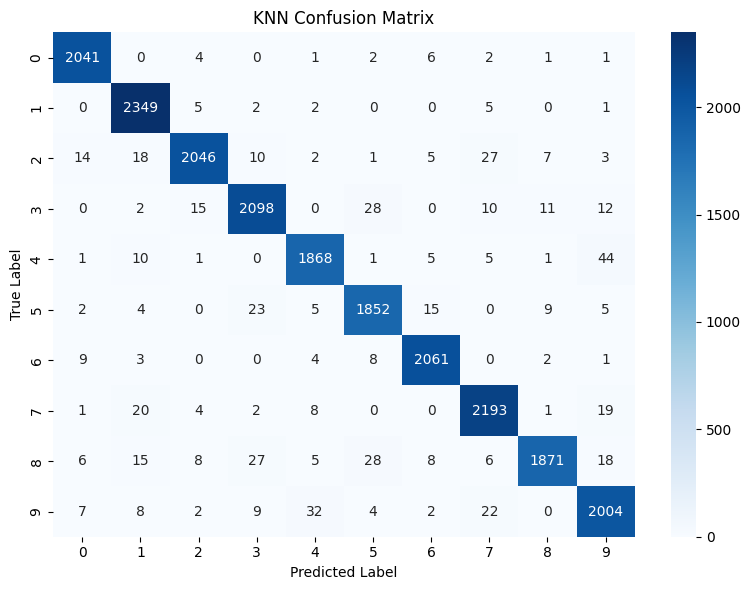

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST
print("📥 Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

print(f"✅ Dataset loaded. Total samples: {len(X)}")

# Normalize
X = X / 255.0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN directly (no GridSearch)
print("🚀 Training KNN with n_neighbors=3, weights='distance', algorithm='auto'...")
knn = KNeighborsClassifier(
    n_neighbors=2,
    weights='distance',
    algorithm='auto',
    p=2,
    metric='minkowski',
    n_jobs=-1
)
knn.fit(X_train, y_train)

# Predictions
print("🔍 Making predictions on test set...")
y_pred = knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 KNN Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


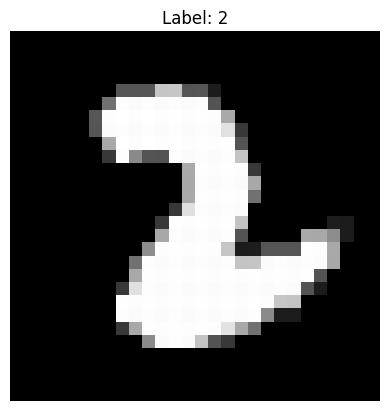

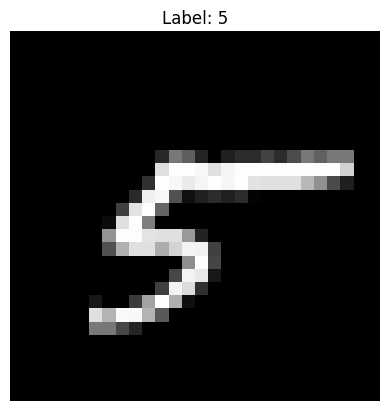

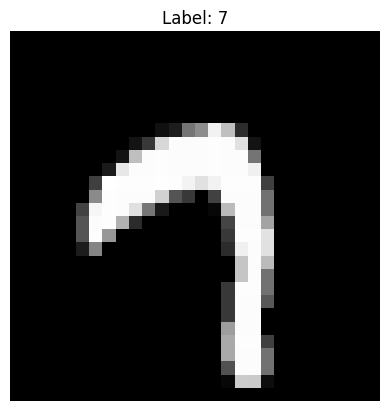

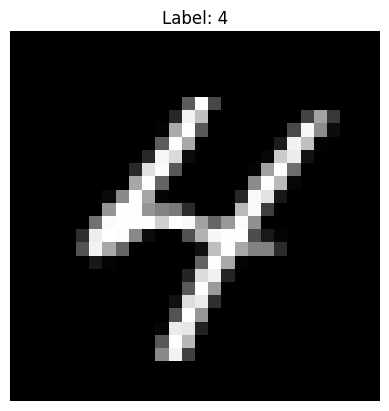

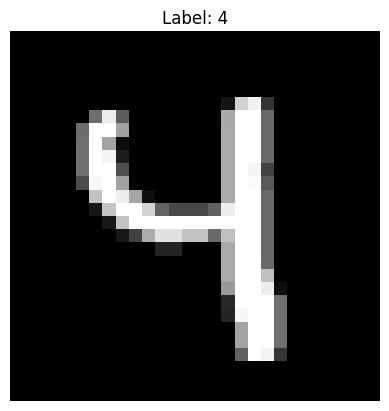

In [ ]:
# prompt: give us sample imahe feom mnist dataset

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST dataset
'''mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)'''

# Normalize pixel values
X = X / 255.0

# Select a random image
import random
for i in range(5):
  random_index = random.randint(0, len(X) - 1)
  image = X[random_index].reshape(28, 28)  # Reshape to 28x28
  label = y[random_index]

  # Display the image
  plt.imshow(image, cmap='gray')
  plt.title(f"Label: {label}")
  plt.axis('off')
  plt.show()


In [ ]:
import joblib
# Save the trained model
joblib.dump(knn, "knn_mnist_model6.sav")
print("💾 Model saved as 'knn_mnist_model.sav'")

💾 Model saved as 'knn_mnist_model.sav'


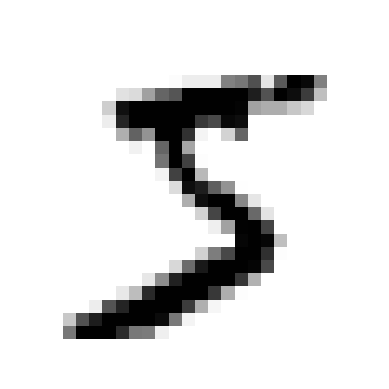

In [ ]:
# prompt: show a picture of mnist data

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# Display a sample image
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()


In [ ]:
print("Image dimensions:", some_digit_image.shape)

Image dimensions: (28, 28)
